In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']
sms_raw

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'deal', 'subscribe', 'shopper', 'Clearance', 'Cost']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

sms_raw['allcaps'] = sms_raw.message.str.isupper()

sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

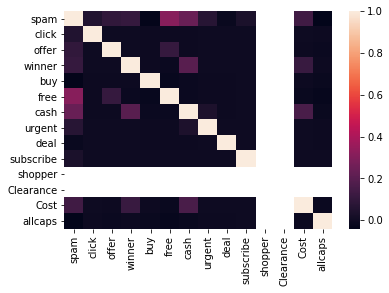

In [4]:
sns.heatmap(sms_raw.corr())

In [5]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [6]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 594


In [7]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(data, target)

y_pred = gnb.predict(data)

print('Number of mislabeled points out of a total {} points : {}'.format(
    data.shape[0], 
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 594


In [8]:
sms_raw

,spam,message,click,offer,winner,buy,free,cash,urgent,deal,subscribe,shopper,Clearance,Cost,allcaps
0,False,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,Even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,False,False,False,False,False,False
8,True,WINNER!! As a valued network customer you have...,False,False,False,False,False,False,False,False,False,False,False,False,False
9,True,Had your mobile 11 months or more? U R entitle...,False,False,False,False,True,False,False,False,False,False,False,False,False
